# 한국복지 패널 데이터
 - 한국보건사회연구원에서 우리나라 가구의 경제활동을 연구해 복지 정책을 반영할 목적으로 발간한 자료
 - 전국 7천여 가구 선정해서 2006년도 부터 2019년까지 조사한 자료

In [797]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

In [798]:
welfare = pd.read_csv('welfare.csv')
welfare

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
0,0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
14413,14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [799]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   14418 non-null  int64  
 1   gender       14418 non-null  float64
 2   birth        14418 non-null  float64
 3   marriage     14418 non-null  float64
 4   religion     14418 non-null  float64
 5   income       4534 non-null   float64
 6   code_job     6878 non-null   float64
 7   code_region  14418 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 901.2 KB


In [800]:
welfare.isnull().sum()

Unnamed: 0        0
gender            0
birth             0
marriage          0
religion          0
income         9884
code_job       7540
code_region       0
dtype: int64

In [801]:
welfare_copy = welfare.copy()

In [802]:
welfare = welfare_copy.copy()

# 데이터 전처리 하기

In [803]:
#데이터 이상치 있는지 여부 확인

welfare['gender'].value_counts()

# 1 - man 2- woman

2.0    7913
1.0    6505
Name: gender, dtype: int64

In [804]:
welfare['gender'] = np.where(welfare['gender'] == 1 ,'male', 'female')
welfare

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
0,0,female,1945.0,2.0,1.0,NaN,NaN,1.0
1,1,male,1948.0,2.0,2.0,NaN,NaN,1.0
2,2,male,1942.0,3.0,1.0,107.0,762.0,1.0
3,3,male,1962.0,1.0,1.0,192.0,855.0,1.0
4,4,female,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
14413,14413,female,1967.0,1.0,1.0,NaN,NaN,5.0
14414,14414,female,1992.0,5.0,1.0,NaN,NaN,5.0
14415,14415,male,1995.0,5.0,1.0,NaN,910.0,5.0
14416,14416,female,1998.0,5.0,1.0,200.0,246.0,5.0


In [805]:
welfare['gender'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
14413    False
14414    False
14415    False
14416    False
14417    False
Name: gender, Length: 14418, dtype: bool

In [806]:
#결측치 확인
welfare['gender'].isna().sum()

0

<AxesSubplot:xlabel='gender', ylabel='count'>

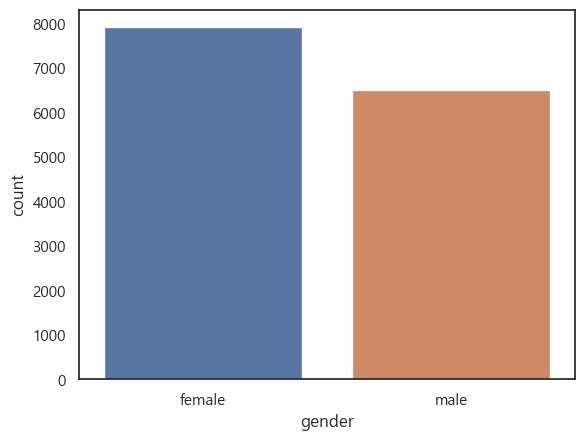

In [807]:
# seaborn 라이브러리 불러오기
import seaborn as sns
# --> 데이터 시각화 라이브러리
# matploylib보다 쉽고 간편하게 사용 가능. 단, 자세한 그래프를 그리기 어렵다
sns.countplot(data = welfare , x = 'gender')
# countplot(데이터 설명) : 카테고리별 데이터의 개수를 바로 세어주는 함수

# 1. 결혼여부, 종교 여부 이상치 확인하고 데이터 변경(실습)

## 종교 여부(이것만 해보기)

 - 있으면 yes, 없으면 no로 변경하기
 - 1 : 있음 
 - 2 : 없음

In [808]:
welfare['religion'].value_counts().sort_index()

1.0    6603
2.0    7815
Name: religion, dtype: int64

In [809]:
welfare['religion'] = np.where(welfare['religion'] == 1 ,'yes', 'no')
welfare

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
0,0,female,1945.0,2.0,yes,NaN,NaN,1.0
1,1,male,1948.0,2.0,no,NaN,NaN,1.0
2,2,male,1942.0,3.0,yes,107.0,762.0,1.0
3,3,male,1962.0,1.0,yes,192.0,855.0,1.0
4,4,female,1963.0,1.0,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
14413,14413,female,1967.0,1.0,yes,NaN,NaN,5.0
14414,14414,female,1992.0,5.0,yes,NaN,NaN,5.0
14415,14415,male,1995.0,5.0,yes,NaN,910.0,5.0
14416,14416,female,1998.0,5.0,yes,200.0,246.0,5.0


In [810]:
welfare['religion'].isna().sum()

0

In [811]:
welfare['religion'].value_counts().sort_index()

no     7815
yes    6603
Name: religion, dtype: int64

<AxesSubplot:xlabel='religion', ylabel='count'>

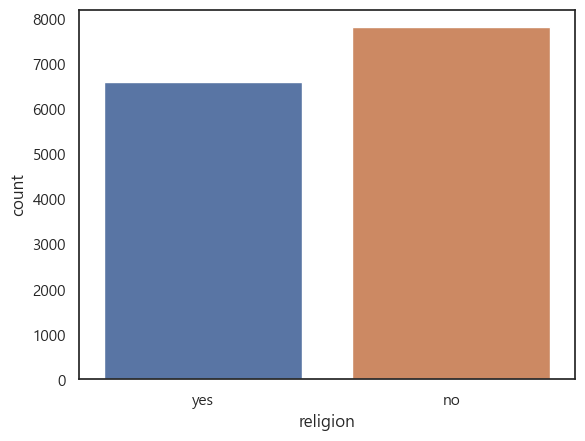

In [812]:
sns.countplot(data = welfare , x = 'religion')

In [813]:
#원본데이터 먼저 확인해보기 0~6으로 구성
welfare['marriage'].value_counts().sort_index()

0.0    2121
1.0    7190
2.0    1954
3.0     689
4.0      78
5.0    2357
6.0      29
Name: marriage, dtype: int64

## 결혼 데이터 정보
 - 0 : 미해당(18세 미만)
 - 1 : 결혼
 - 2 : 사별
 - 3 : 이혼
 - 4 : 별거
 - 5 : 미혼
 - 6 : 기타
 
### 결혼, 이혼, 그 외 3분류로 바꿔보기

In [814]:
def getMarriage(row):
    marriage = row['marriage']
    if marriage == 1:
        return "marriage"
    elif marriage == 3:
        return "divorce"
    elif marriage == 5:
        return 'not marriage'
    else:
        return "etc"

In [815]:
welfare['marriage']  = welfare.apply(getMarriage , axis = 1)
# apply(함수, axis = ) : 함수를 행단위 or 열단위로 요소별 적용시켜주는 함수

In [816]:
welfare

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
0,0,female,1945.0,etc,yes,NaN,NaN,1.0
1,1,male,1948.0,etc,no,NaN,NaN,1.0
2,2,male,1942.0,divorce,yes,107.0,762.0,1.0
3,3,male,1962.0,marriage,yes,192.0,855.0,1.0
4,4,female,1963.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
14413,14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,14414,female,1992.0,not marriage,yes,NaN,NaN,5.0
14415,14415,male,1995.0,not marriage,yes,NaN,910.0,5.0
14416,14416,female,1998.0,not marriage,yes,200.0,246.0,5.0


## countplot으로 표현하기

<AxesSubplot:xlabel='marriage', ylabel='count'>

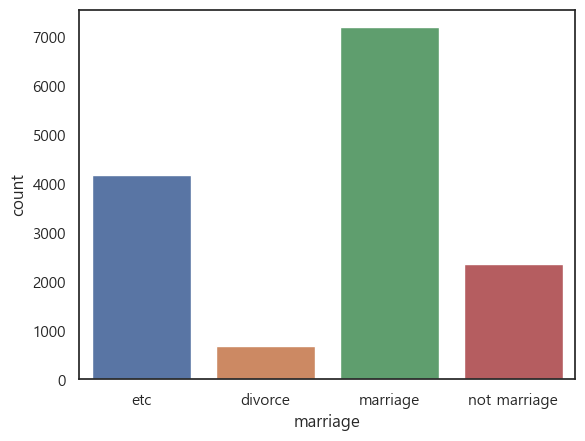

In [817]:
sns.countplot(data = welfare, x = 'marriage')

# 종교 유무에 따른 이혼율 표 만들기

In [818]:
welfare

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
0,0,female,1945.0,etc,yes,NaN,NaN,1.0
1,1,male,1948.0,etc,no,NaN,NaN,1.0
2,2,male,1942.0,divorce,yes,107.0,762.0,1.0
3,3,male,1962.0,marriage,yes,192.0,855.0,1.0
4,4,female,1963.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
14413,14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,14414,female,1992.0,not marriage,yes,NaN,NaN,5.0
14415,14415,male,1995.0,not marriage,yes,NaN,910.0,5.0
14416,14416,female,1998.0,not marriage,yes,200.0,246.0,5.0


In [819]:
# groupby('religion')['marriage'].value_counts()
r_g = welfare.groupby('religion', as_index = False)['marriage'].value_counts(normalize = True)
# groupby : 같은 요소끼리 그룹화
# 각 데이터별 비율을 나타내주는 속성 normalize = True
r_g

,religion,marriage,proportion
0,no,marriage,0.468330
1,no,etc,0.290723
2,no,not marriage,0.191811
3,no,divorce,0.049136
4,yes,marriage,0.534605
5,yes,etc,0.289262
6,yes,not marriage,0.129941
7,yes,divorce,0.046191


In [820]:
# 여기서 우리가 필요한건 marriage 컬럼이 marriage이거나 divorce인 데이터
prop = r_g[(r_g['marriage']=='marriage') | (r_g['marriage']=='divorce')]
prop

,religion,marriage,proportion
0,no,marriage,0.468330
3,no,divorce,0.049136
4,yes,marriage,0.534605
7,yes,divorce,0.046191


In [821]:
a = prop['proportion'] * 100
a

0    46.833013
3     4.913628
4    53.460548
7     4.619113
Name: proportion, dtype: float64

In [822]:
b['proportion'] = (a).round(1)
b

C:\Users\minza\AppData\Local\Temp\ipykernel_35692\1197916797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['proportion'] = (a).round(1)


,religion,marriage,proportion
0,no,marriage,46.8
3,no,divorce,4.9
4,yes,marriage,53.5
7,yes,divorce,4.6


<AxesSubplot:xlabel='religion', ylabel='proportion'>

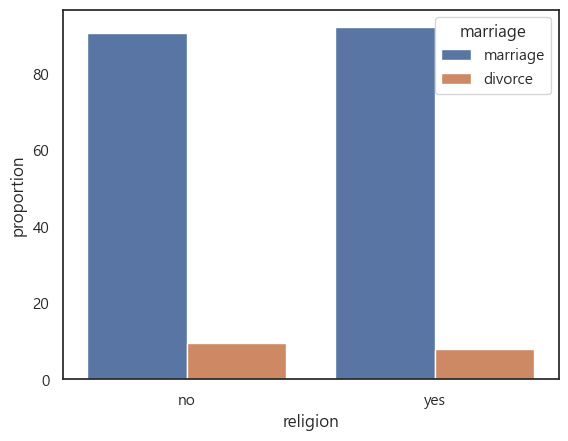

In [823]:
# hue : 색깔이라는 뜻을 가진 단어로, 바 그래프가 각각 어떤 데이터인지 구분해준다
sns.barplot(data = rel_div, x= 'religion', y = 'proportion', hue = 'marriage')

In [824]:
# --> 여기부터는 참고

In [825]:
# query('조건문 쿼리') --> 데이터베이스 조건문 쿼리를 가져다 쓸 수 있는 함수
rel_div = welfare.query('marriage == "marriage" or marriage == "divorce"').groupby('religion', as_index = False)['marriage'].value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [826]:
rel_div['proportion'] = (rel_div['proportion'] * 100 ).round(1)
rel_div

,religion,marriage,proportion
0,no,marriage,90.5
1,no,divorce,9.5
2,yes,marriage,92.0
3,yes,divorce,8.0


<AxesSubplot:xlabel='religion', ylabel='proportion'>

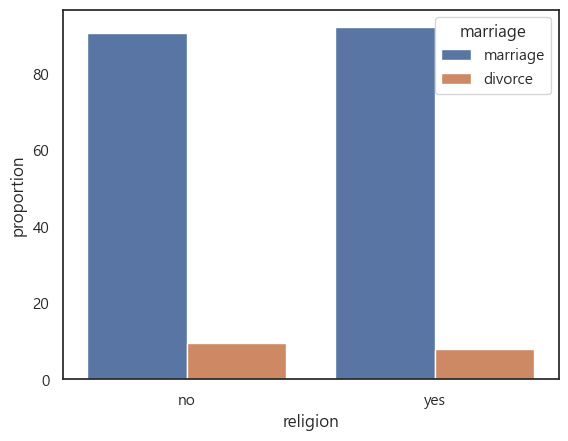

In [827]:
sns.barplot(data = rel_div, x= 'religion', y = 'proportion', hue = 'marriage')

# 얻을 수 있는 인사이트는?
 - 종교와 이혼율은 크게 상관이 없다!


# 2. 성별 별 수입 확인하기

In [828]:
# describe() 함수 : 수치형 변수들만을 기준으로 
# 카운트, 평균, 표준편차, 최소/최댓값, 25%, 50%, 75% 값을 각각 구해줌 --> 수치해석 함수
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [829]:
welfare['income'].isna().sum()

9884

#### min값을 바탕으로 0원 이라는 이상치, 9884개의 결측치 확인

In [830]:
# query 함수를 한번 써보자!
# income이라는 컬럼 값이 0인 튜플만 출력해달라!
# SELECT * FROM welfare WHERE income = 0
welfare.query('income == 0')

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
4715,4715,female,1983.0,marriage,no,0.0,311.0,5.0
6347,6347,female,1983.0,marriage,yes,0.0,252.0,1.0
6632,6632,female,1991.0,not marriage,yes,0.0,313.0,2.0
10487,10487,female,1980.0,marriage,no,0.0,311.0,3.0
10620,10620,female,1985.0,marriage,yes,0.0,320.0,3.0
10818,10818,female,1981.0,marriage,yes,0.0,243.0,3.0
13654,13654,female,1978.0,marriage,yes,0.0,252.0,6.0


#### 수입이 0원으로 되어있는 총 7개의 데이터 확인!

- code_job을 바탕으로 직업이 있는 것으로 판단이 되나 수입이 적혀 있지 않음
- job_code 데이터를 바탕으로 해당 직업 확인해 보기

In [831]:
import pandas as pd

In [832]:
job_code = pd.read_csv('job_code.csv', encoding='euc-kr')
job_code

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자
...,...,...
151,992,계기?자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [833]:
job_code.query("code_job == 252 | code_job == 243 | code_job == 311 | code_job == 313 |code_job == 320")

,code_job,job
35,243,간호사
42,252,학교 교사
60,311,행정 사무원
62,313,회계 및 경리 사무원
64,320,금융 사무 종사자


In [834]:
welfare.query('code_job == 252')

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
409,409,male,1982.0,marriage,no,450.0,252.0,1.0
577,577,female,1973.0,marriage,yes,525.0,252.0,2.0
735,735,female,1978.0,marriage,yes,510.0,252.0,1.0
894,894,female,1975.0,marriage,no,508.0,252.0,1.0
897,897,female,1979.0,marriage,no,400.0,252.0,7.0
...,...,...,...,...,...,...,...,...
13644,13644,female,1985.0,not marriage,no,458.0,252.0,3.0
13654,13654,female,1978.0,marriage,yes,0.0,252.0,6.0
13655,13655,male,1977.0,marriage,yes,499.0,252.0,6.0
13883,13883,male,1964.0,marriage,no,759.0,252.0,5.0


### 7명의 직업은 위와 같음
### 데이터의 오류 해결 방법은 2가지
#### 1. 이상치 채워주기 ( 예- 해당 직업의 평균 연봉, 중간 값 넣어주기)
#### 2. 이상치 데이터 버리기 (주로 이상치 데이터를 삭제해도 무관할때 주로 삭제)

In [835]:
welfare[welfare['income'].isna()]

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
0,0,female,1945.0,etc,yes,NaN,NaN,1.0
1,1,male,1948.0,etc,no,NaN,NaN,1.0
4,4,female,1963.0,marriage,yes,NaN,NaN,1.0
5,5,female,2003.0,etc,yes,NaN,NaN,1.0
6,6,male,1927.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
14412,14412,male,1967.0,marriage,yes,NaN,874.0,5.0
14413,14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,14414,female,1992.0,not marriage,yes,NaN,NaN,5.0
14415,14415,male,1995.0,not marriage,yes,NaN,910.0,5.0


In [836]:
welfare[welfare['income'].notna()]

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
2,2,male,1942.0,divorce,yes,107.0,762.0,1.0
3,3,male,1962.0,marriage,yes,192.0,855.0,1.0
7,7,female,1934.0,marriage,yes,27.0,941.0,1.0
8,8,female,1940.0,etc,yes,27.0,999.0,2.0
14,14,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...,...
14401,14401,male,1966.0,marriage,yes,280.0,874.0,6.0
14402,14402,female,1962.0,marriage,yes,209.0,930.0,6.0
14405,14405,female,1947.0,etc,no,27.0,941.0,6.0
14410,14410,male,1956.0,marriage,yes,200.0,854.0,6.0


In [837]:
# 수입 + 직업코드 둘다 결측치인 행 인덱스 확인하기 
welfare.query('income.isna() and code_job.isna()')

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
0,0,female,1945.0,etc,yes,NaN,NaN,1.0
1,1,male,1948.0,etc,no,NaN,NaN,1.0
4,4,female,1963.0,marriage,yes,NaN,NaN,1.0
5,5,female,2003.0,etc,yes,NaN,NaN,1.0
6,6,male,1927.0,marriage,yes,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
14407,14407,male,1933.0,marriage,no,NaN,NaN,6.0
14409,14409,female,1934.0,etc,yes,NaN,NaN,6.0
14413,14413,female,1967.0,marriage,yes,NaN,NaN,5.0
14414,14414,female,1992.0,not marriage,yes,NaN,NaN,5.0


In [838]:
drop_ind = welfare[(welfare['income'].isna()) & (welfare['code_job'].isna())].index
welfare_drop = welfare.drop(drop_ind)
welfare_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6878 entries, 2 to 14416
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6878 non-null   int64  
 1   gender       6878 non-null   object 
 2   birth        6878 non-null   float64
 3   marriage     6878 non-null   object 
 4   religion     6878 non-null   object 
 5   income       4534 non-null   float64
 6   code_job     6878 non-null   float64
 7   code_region  6878 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 483.6+ KB


In [839]:
# 인덱스 번호 1~ 정리 
welfare_drop.index = range(1, len(welfare_drop)+1)
welfare_drop

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
1,2,male,1942.0,divorce,yes,107.0,762.0,1.0
2,3,male,1962.0,marriage,yes,192.0,855.0,1.0
3,7,female,1934.0,marriage,yes,27.0,941.0,1.0
4,8,female,1940.0,etc,yes,27.0,999.0,2.0
5,14,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...,...
6874,14410,male,1956.0,marriage,yes,200.0,854.0,6.0
6875,14411,female,1958.0,marriage,yes,NaN,611.0,6.0
6876,14412,male,1967.0,marriage,yes,NaN,874.0,5.0
6877,14415,male,1995.0,not marriage,yes,NaN,910.0,5.0


In [840]:
welfare_drop['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [841]:
code_income_avg = welfare_drop[['code_job','income']].groupby('code_job').median()
code_income_avg # null 제외 직업 개수

,income
code_job,
111.0,461.0
112.0,465.0
121.0,754.0
122.0,467.5
131.0,566.5
...,...
992.0,183.0
999.0,27.0
1001.0,572.0


In [842]:
code_income_avg[code_income_avg['income'].isna()]

,income
code_job,
423.0,NaN
613.0,NaN
823.0,NaN


In [843]:
code_income_avg.loc[823]
# 여기 까지 남기기 

income   NaN
Name: 823.0, dtype: float64

In [844]:
# 사용자 정의함수 연결하기 
# def fill_income(row):
#     print(row)

In [845]:
code_income_avg.loc[welfare_drop['code_job']].values[0]

array([303.])

In [846]:
def fill_income(row):
    # 수입 값이 결측치 일때 
    if np.isnan(row['income']):
        return code_income_avg.loc[row['code_job']].values[0]
    # 수입 값이 결측치 아닐 때
    else:
        return row['income']

In [847]:
welfare_drop['income'] = welfare_drop.apply(fill_income, axis = 1)
welfare_drop[welfare_drop['income'].isnull()]

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
239,458,male,1966.0,marriage,no,NaN,823.0,1.0
240,459,female,1966.0,marriage,no,NaN,823.0,1.0
713,1476,male,1947.0,marriage,no,NaN,823.0,1.0
714,1477,female,1949.0,marriage,no,NaN,823.0,1.0
718,1489,male,1957.0,marriage,no,NaN,823.0,1.0
719,1490,female,1963.0,marriage,no,NaN,823.0,1.0
769,1591,male,1975.0,marriage,no,NaN,823.0,1.0
1034,2158,male,1959.0,marriage,yes,NaN,823.0,3.0
1066,2242,male,1938.0,marriage,yes,NaN,823.0,3.0
1342,2841,male,1936.0,etc,no,NaN,613.0,4.0


In [848]:
welfare_drop[welfare_drop['income'].isnull()].size

440

In [849]:
welfare_drop = welfare_drop.dropna(subset = ['income'])
welfare_drop

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
1,2,male,1942.0,divorce,yes,107.0,762.0,1.0
2,3,male,1962.0,marriage,yes,192.0,855.0,1.0
3,7,female,1934.0,marriage,yes,27.0,941.0,1.0
4,8,female,1940.0,etc,yes,27.0,999.0,2.0
5,14,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...,...
6874,14410,male,1956.0,marriage,yes,200.0,854.0,6.0
6875,14411,female,1958.0,marriage,yes,218.0,611.0,6.0
6876,14412,male,1967.0,marriage,yes,338.5,874.0,5.0
6877,14415,male,1995.0,not marriage,yes,260.0,910.0,5.0


In [850]:
welfare_drop[welfare_drop['income'].isnull()].size

0

In [851]:
welfare_drop[welfare_drop['income']==0].size

56

In [852]:
welfare_drop['income'] = np.where(welfare_drop['income'] ==0 , np.nan, welfare_drop['income'])
welfare_drop['income'].isna().sum() # 7개 데이터 추가

C:\Users\minza\AppData\Local\Temp\ipykernel_35692\2456554303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  welfare_drop['income'] = np.where(welfare_drop['income'] ==0 , np.nan, welfare_drop['income'])


7

In [853]:
#결측치 제거 - dropna
gender_income = welfare_drop.dropna(subset = ['income'])
gender_income

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region
1,2,male,1942.0,divorce,yes,107.0,762.0,1.0
2,3,male,1962.0,marriage,yes,192.0,855.0,1.0
3,7,female,1934.0,marriage,yes,27.0,941.0,1.0
4,8,female,1940.0,etc,yes,27.0,999.0,2.0
5,14,male,1978.0,marriage,no,338.0,312.0,1.0
...,...,...,...,...,...,...,...,...
6874,14410,male,1956.0,marriage,yes,200.0,854.0,6.0
6875,14411,female,1958.0,marriage,yes,218.0,611.0,6.0
6876,14412,male,1967.0,marriage,yes,338.5,874.0,5.0
6877,14415,male,1995.0,not marriage,yes,260.0,910.0,5.0


In [854]:
welfare_drop[welfare_drop['income']==0].size

0

In [855]:
gender_income = welfare_drop.groupby('gender', as_index = False).agg(mean_income = ('income', 'mean'))
gender_income
# agg() --> apply()와 비슷한 기능을 하는 함수, agg는 여러 함수를 동시에 입력할 수 있다.

,gender,mean_income
0,female,190.280031
1,male,311.430076


<AxesSubplot:xlabel='gender', ylabel='mean_income'>

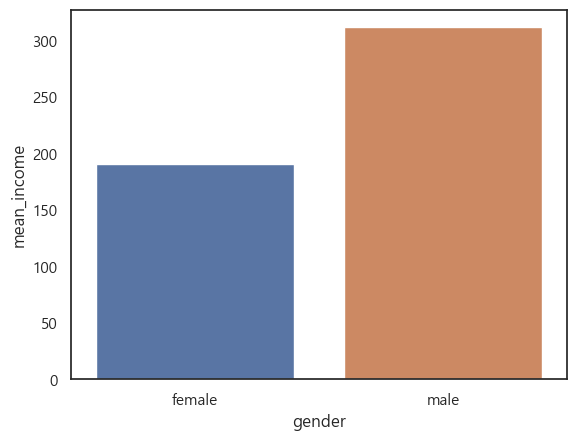

In [856]:
sns.barplot(data = gender_income, x = 'gender', y = 'mean_income')

# 나이 파생변수 만들기

In [857]:
welfare['birth']

0        1945.0
1        1948.0
2        1942.0
3        1962.0
4        1963.0
          ...  
14413    1967.0
14414    1992.0
14415    1995.0
14416    1998.0
14417    2001.0
Name: birth, Length: 14418, dtype: float64

In [858]:
welfare['birth'].isna().sum()

0

In [859]:
welfare['age'] = 2019 - welfare['birth']
welfare['age']

0        74.0
1        71.0
2        77.0
3        57.0
4        56.0
         ... 
14413    52.0
14414    27.0
14415    24.0
14416    21.0
14417    18.0
Name: age, Length: 14418, dtype: float64

In [860]:
welfare['age'].describe()
#이상치 발견

count    14418.000000
mean        49.719795
std         24.402250
min          1.000000
25%         29.000000
50%         51.000000
75%         71.000000
max        112.000000
Name: age, dtype: float64

In [861]:
age_income = welfare.groupby('age', as_index = False).agg(income_mean = ('income', 'mean'))
age_income

,age,income_mean
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
3,4.0,NaN
4,5.0,NaN
...,...,...
97,98.0,NaN
98,99.0,NaN
99,100.0,NaN
100,102.0,NaN


In [862]:
age_income.query('income_mean.isna()')
age_income.query('income_mean.isna()')['age'].count()

28

In [863]:
#생략
age_income[age_income['income_mean'].notna()]

,age,income_mean
17,18.0,162.000000
18,19.0,121.333333
19,20.0,136.400000
20,21.0,123.666667
21,22.0,179.676471
...,...,...
86,87.0,27.000000
87,88.0,27.000000
88,89.0,27.000000
89,90.0,20.000000


In [864]:
age_income = age_income.dropna(subset=['income_mean'])
age_income

,age,income_mean
17,18.0,162.000000
18,19.0,121.333333
19,20.0,136.400000
20,21.0,123.666667
21,22.0,179.676471
...,...,...
86,87.0,27.000000
87,88.0,27.000000
88,89.0,27.000000
89,90.0,20.000000


<AxesSubplot:xlabel='age', ylabel='income_mean'>

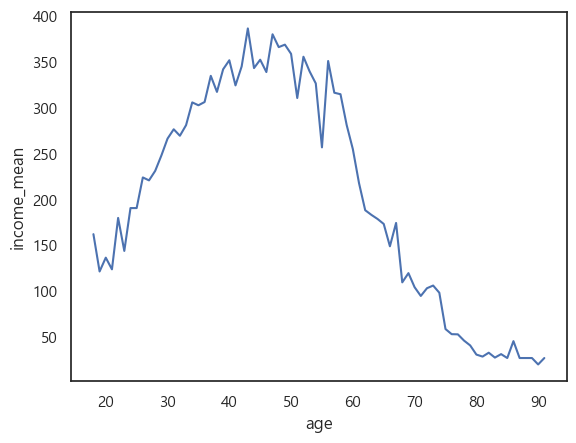

In [865]:
#drop 했을 때 
sns.lineplot(data = age_income , x = 'age', y = 'income_mean')

<AxesSubplot:xlabel='age', ylabel='income_mean'>

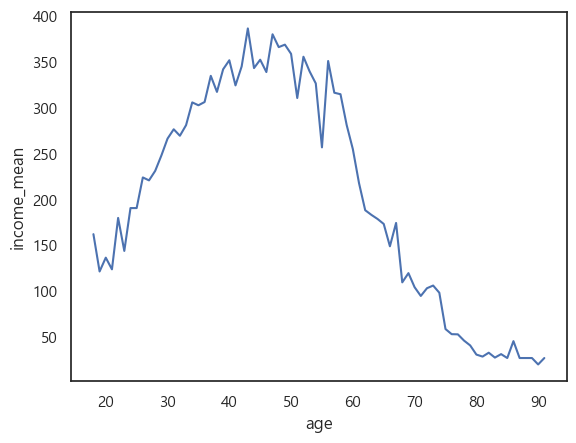

In [866]:
#drop안했을 때 
sns.lineplot(data = age_income , x = 'age', y = 'income_mean')

## 알 수 있는 insight

- 수입이 가장 많은 나이는 40대, 50대 사이이다
- 60세 이후에 수입이 급감한다

# 실습) 나이 및 성별 월급 차 보기

In [867]:
age_income = welfare.groupby(['age','gender'], as_index = False).agg(income_mean = ('income', 'mean'))
age_income

,age,gender,income_mean
0,1.0,female,NaN
1,1.0,male,NaN
2,2.0,female,NaN
3,2.0,male,NaN
4,3.0,female,NaN
...,...,...,...
195,99.0,female,NaN
196,100.0,female,NaN
197,100.0,male,NaN
198,102.0,male,NaN


In [868]:
age_gender_income = age_income = welfare.groupby(['age','gender'], as_index = False).agg(income_mean = ('income', 'mean'))
age_gender_income

,age,gender,income_mean
0,1.0,female,NaN
1,1.0,male,NaN
2,2.0,female,NaN
3,2.0,male,NaN
4,3.0,female,NaN
...,...,...,...
195,99.0,female,NaN
196,100.0,female,NaN
197,100.0,male,NaN
198,102.0,male,NaN


In [869]:
age_gender_income= age_gender_income.dropna(subset=['income_mean'])
age_gender_income

,age,gender,income_mean
35,18.0,male,162.000000
36,19.0,female,87.666667
37,19.0,male,155.000000
38,20.0,female,124.000000
39,20.0,male,186.000000
...,...,...,...
175,88.0,male,27.000000
176,89.0,female,27.000000
178,90.0,female,27.000000
179,90.0,male,13.000000


<AxesSubplot:xlabel='age', ylabel='income_mean'>

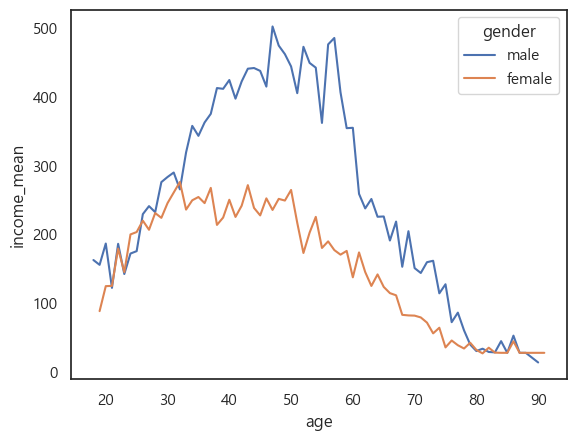

In [870]:
sns.lineplot(data = age_gender_income , x = 'age', y = 'income_mean', hue = 'gender')

In [871]:
welfare.query("age == 1 | age >=100")

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region,age
566,566,male,1917.0,etc,no,NaN,NaN,7.0,102.0
804,804,female,2018.0,etc,yes,NaN,NaN,2.0,1.0
2111,2111,female,2018.0,etc,no,NaN,NaN,3.0,1.0
2178,2178,male,2018.0,etc,no,NaN,NaN,3.0,1.0
2427,2427,female,2018.0,etc,no,NaN,NaN,3.0,1.0
2726,2726,female,2018.0,etc,yes,NaN,NaN,2.0,1.0
2808,2808,female,1907.0,etc,yes,NaN,NaN,4.0,112.0
4128,4128,male,2018.0,etc,yes,NaN,NaN,7.0,1.0
4259,4259,female,2018.0,etc,no,NaN,NaN,7.0,1.0
4332,4332,male,2018.0,etc,no,NaN,NaN,7.0,1.0


# 데이터 결합하기

In [872]:
welfare

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region,age
0,0,female,1945.0,etc,yes,NaN,NaN,1.0,74.0
1,1,male,1948.0,etc,no,NaN,NaN,1.0,71.0
2,2,male,1942.0,divorce,yes,107.0,762.0,1.0,77.0
3,3,male,1962.0,marriage,yes,192.0,855.0,1.0,57.0
4,4,female,1963.0,marriage,yes,NaN,NaN,1.0,56.0
...,...,...,...,...,...,...,...,...,...
14413,14413,female,1967.0,marriage,yes,NaN,NaN,5.0,52.0
14414,14414,female,1992.0,not marriage,yes,NaN,NaN,5.0,27.0
14415,14415,male,1995.0,not marriage,yes,NaN,910.0,5.0,24.0
14416,14416,female,1998.0,not marriage,yes,200.0,246.0,5.0,21.0


In [873]:
job_code

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자
...,...,...
151,992,계기?자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [874]:
welfare_job = welfare.merge(job_code, how='left', on = 'code_job')
welfare_job

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region,age,job
0,0,female,1945.0,etc,yes,NaN,NaN,1.0,74.0,NaN
1,1,male,1948.0,etc,no,NaN,NaN,1.0,71.0,NaN
2,2,male,1942.0,divorce,yes,107.0,762.0,1.0,77.0,전기공
3,3,male,1962.0,marriage,yes,192.0,855.0,1.0,57.0,금속기계 부품 조립원
4,4,female,1963.0,marriage,yes,NaN,NaN,1.0,56.0,NaN
...,...,...,...,...,...,...,...,...,...,...
14413,14413,female,1967.0,marriage,yes,NaN,NaN,5.0,52.0,NaN
14414,14414,female,1992.0,not marriage,yes,NaN,NaN,5.0,27.0,NaN
14415,14415,male,1995.0,not marriage,yes,NaN,910.0,5.0,24.0,건설 및 광업 단순 종사자
14416,14416,female,1998.0,not marriage,yes,200.0,246.0,5.0,21.0,보건 의료 관련 종사자


In [875]:
# welfare_job2 = welfare.merge(job_code, how='right', on = 'code_job')
# welfare_job2

In [876]:
welfare_drop_job = welfare_job.dropna(subset=['job','income'])
welfare_drop_job

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region,age,job
2,2,male,1942.0,divorce,yes,107.0,762.0,1.0,77.0,전기공
3,3,male,1962.0,marriage,yes,192.0,855.0,1.0,57.0,금속기계 부품 조립원
7,7,female,1934.0,marriage,yes,27.0,941.0,1.0,85.0,청소원 및 환경미화원
8,8,female,1940.0,etc,yes,27.0,999.0,2.0,79.0,기타 서비스 관련 단순 종사자
14,14,male,1978.0,marriage,no,338.0,312.0,1.0,41.0,경영 관련 사무원
...,...,...,...,...,...,...,...,...,...,...
14401,14401,male,1966.0,marriage,yes,280.0,874.0,6.0,53.0,물품 이동 장비 조작원
14402,14402,female,1962.0,marriage,yes,209.0,930.0,6.0,57.0,제조 관련 단순 종사자
14405,14405,female,1947.0,etc,no,27.0,941.0,6.0,72.0,청소원 및 환경미화원
14410,14410,male,1956.0,marriage,yes,200.0,854.0,6.0,63.0,운송차량 및 기계 관련 조립원


In [877]:
job_income = welfare_drop_job.groupby('job', as_index = False)\
.agg(mean_income = ('income','mean'))

job_income

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정?기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학?고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경?청소 및 경비 관련 관리자,201.000000
145,환경공학?가스·에너지 기술자 및 시험원,511.000000


In [878]:
# job_income = welfare_job.dropna(subset=['job','income'])\
# .groupby('job', as_index = False)\
# .agg(mean_income = ('income','mean'))
# job_income

In [879]:
job_income.sort_values(by = 'mean_income', ascending=False)

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
...,...,...
43,돌봄 및 보건 서비스 종사자,117.162338
0,가사 및 육아 도우미,92.455882
128,청소원 및 환경미화원,88.461756
34,기타 서비스 관련 단순 종사자,77.789474


In [880]:
# seaborn 전용 한글 인코딩
sns.set(font="Malgun Gothic", style='white')  # style = 'white'  : 그래프 배경 하얗게

<AxesSubplot:xlabel='mean_income', ylabel='job'>

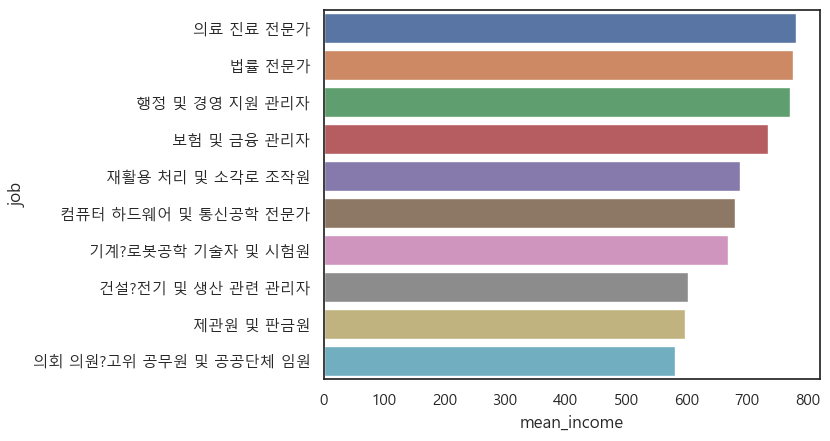

In [881]:
top10 = job_income.sort_values(by = 'mean_income', ascending=False).head(10)
sns.barplot(data = top10, y = 'job', x = 'mean_income')

# 실습 ) 남성 직업 빈도표 만들기

1. job 결측치 제거
2. male 만 추출하기
3. job별 그룹 묶기
4. job의 빈도수 구하기
5. 빈도수를 내림차순으로 정렬하기
6. 상위 10개만 추출

In [882]:
welfare_job['job'].value_counts()

작물 재배 종사자            962
청소원 및 환경미화원          391
매장 판매 종사자            354
경영 관련 사무원            275
자동차 운전원              236
                    ... 
기업 고위 임원               2
채굴 및 토목 관련 기능 종사자      2
혼례 및 장례 종사자            1
발전 및 배전장치 조작원          1
철도운송 관련 종사자            1
Name: job, Length: 150, dtype: int64

In [883]:
job_male2 = welfare_job.dropna(subset=['job']).query("gender == 'male'")
job_male2['job'].value_counts()

작물 재배 종사자             486
자동차 운전원               230
경영 관련 사무원             216
매장 판매 종사자             142
영업 종사자                113
                     ... 
혼례 및 장례 종사자             1
가사 및 육아 도우미             1
문화?예술 관련 기획자 및 매니저      1
발전 및 배전장치 조작원           1
철도운송 관련 종사자             1
Name: job, Length: 148, dtype: int64

In [884]:
job_male = welfare_job.dropna(subset=['job']).query("gender == 'male'").groupby('job', as_index= False).agg(cnt = ('job','count')).sort_values('cnt',ascending=False).head(10)

job_male

,job,cnt
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


<AxesSubplot:xlabel='cnt', ylabel='job'>

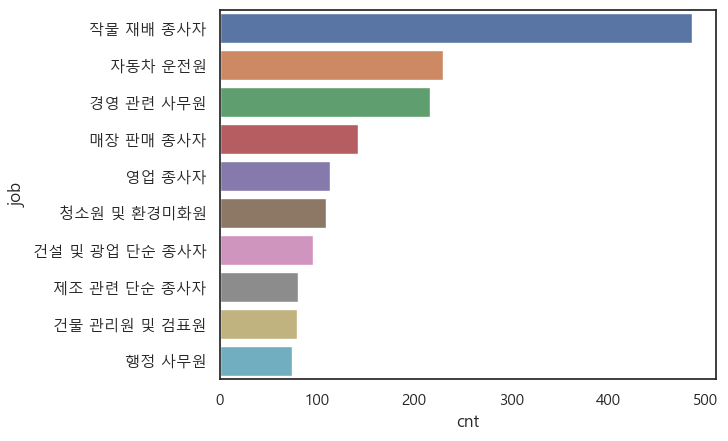

In [885]:
sns.barplot(data = job_male, y= 'job', x = 'cnt')

# 실습 ) 여성 직업 빈도표 만들기

In [886]:
job_female = welfare_job.dropna(subset=['job']).query("gender == 'female'").groupby('job', as_index= False).agg(cnt = ('job','count'))\
.sort_values('cnt',ascending=False).head(10)

job_female

,job,cnt
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


<AxesSubplot:xlabel='cnt', ylabel='job'>

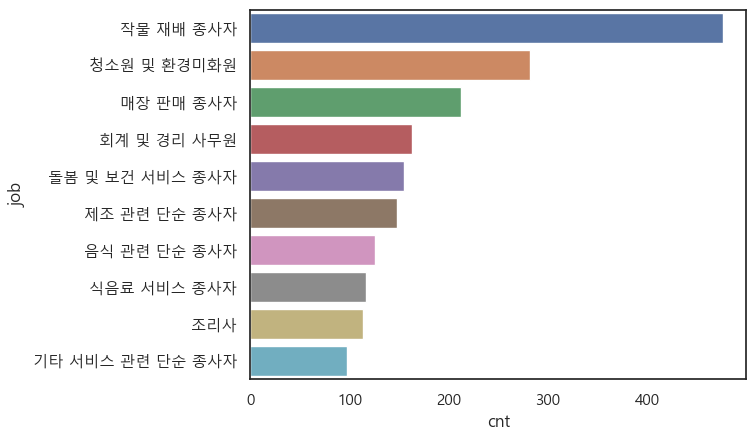

In [887]:
sns.barplot(data = job_female, y= 'job', x = 'cnt')

# 인구수 그래프

In [888]:
welfare_job

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region,age,job
0,0,female,1945.0,etc,yes,NaN,NaN,1.0,74.0,NaN
1,1,male,1948.0,etc,no,NaN,NaN,1.0,71.0,NaN
2,2,male,1942.0,divorce,yes,107.0,762.0,1.0,77.0,전기공
3,3,male,1962.0,marriage,yes,192.0,855.0,1.0,57.0,금속기계 부품 조립원
4,4,female,1963.0,marriage,yes,NaN,NaN,1.0,56.0,NaN
...,...,...,...,...,...,...,...,...,...,...
14413,14413,female,1967.0,marriage,yes,NaN,NaN,5.0,52.0,NaN
14414,14414,female,1992.0,not marriage,yes,NaN,NaN,5.0,27.0,NaN
14415,14415,male,1995.0,not marriage,yes,NaN,910.0,5.0,24.0,건설 및 광업 단순 종사자
14416,14416,female,1998.0,not marriage,yes,200.0,246.0,5.0,21.0,보건 의료 관련 종사자


In [889]:
welfare_age2 = welfare_job.groupby(['age'],as_index = False).agg(cnt = ('age','count'))
welfare_age2 

,age,cnt
0,1.0,22
1,2.0,74
2,3.0,89
3,4.0,101
4,5.0,110
...,...,...
97,98.0,6
98,99.0,2
99,100.0,2
100,102.0,1


<AxesSubplot:xlabel='age', ylabel='cnt'>

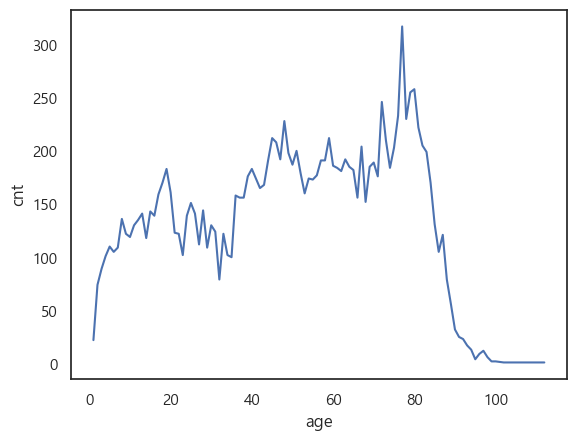

In [890]:
sns.lineplot(data= welfare_age2, x = 'age', y = 'cnt')

In [891]:
welfare_age= welfare_job.groupby(['gender','age'],as_index = False).agg(cnt = ('age','count'))
welfare_age

,gender,age,cnt
0,female,1.0,12
1,female,2.0,37
2,female,3.0,38
3,female,4.0,46
4,female,5.0,59
...,...,...,...
195,male,95.0,2
196,male,97.0,2
197,male,98.0,3
198,male,100.0,1


<AxesSubplot:xlabel='age', ylabel='cnt'>

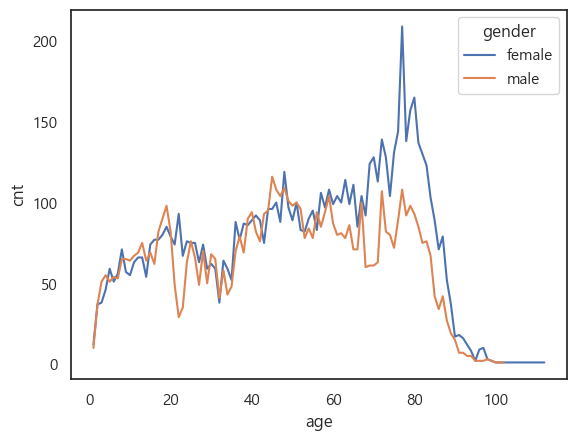

In [892]:
sns.lineplot(data= welfare_age, x = 'age', y = 'cnt', hue = 'gender')

In [893]:
welfare_job.query('job == "작물 재배 종사자"')

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region,age,job
514,514,male,1947.0,marriage,yes,NaN,611.0,4.0,72.0,작물 재배 종사자
862,862,female,1964.0,marriage,no,NaN,611.0,7.0,55.0,작물 재배 종사자
863,863,male,1952.0,marriage,no,NaN,611.0,7.0,67.0,작물 재배 종사자
951,951,male,1947.0,marriage,yes,NaN,611.0,2.0,72.0,작물 재배 종사자
1578,1578,male,1943.0,marriage,no,NaN,611.0,2.0,76.0,작물 재배 종사자
...,...,...,...,...,...,...,...,...,...,...
14394,14394,male,1942.0,marriage,no,NaN,611.0,6.0,77.0,작물 재배 종사자
14395,14395,female,1945.0,marriage,yes,NaN,611.0,6.0,74.0,작물 재배 종사자
14399,14399,male,1941.0,marriage,no,NaN,611.0,6.0,78.0,작물 재배 종사자
14408,14408,female,1936.0,marriage,no,NaN,611.0,6.0,83.0,작물 재배 종사자


In [894]:
welfare_job.query('job == "작물 재배 종사자"').query('income.isna()')

,Unnamed: 0,gender,birth,marriage,religion,income,code_job,code_region,age,job
514,514,male,1947.0,marriage,yes,NaN,611.0,4.0,72.0,작물 재배 종사자
862,862,female,1964.0,marriage,no,NaN,611.0,7.0,55.0,작물 재배 종사자
863,863,male,1952.0,marriage,no,NaN,611.0,7.0,67.0,작물 재배 종사자
951,951,male,1947.0,marriage,yes,NaN,611.0,2.0,72.0,작물 재배 종사자
1578,1578,male,1943.0,marriage,no,NaN,611.0,2.0,76.0,작물 재배 종사자
...,...,...,...,...,...,...,...,...,...,...
14394,14394,male,1942.0,marriage,no,NaN,611.0,6.0,77.0,작물 재배 종사자
14395,14395,female,1945.0,marriage,yes,NaN,611.0,6.0,74.0,작물 재배 종사자
14399,14399,male,1941.0,marriage,no,NaN,611.0,6.0,78.0,작물 재배 종사자
14408,14408,female,1936.0,marriage,no,NaN,611.0,6.0,83.0,작물 재배 종사자


In [895]:
welfare_job.query('job == "작물 재배 종사자"').query('income.isna()').groupby('gender').agg(age_mean = ('age','mean'))

,age_mean
gender,
female,70.846316
male,70.968944
